# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.datetime.fromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(.05)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | bosobolo
Processing Record 2 of Set 1 | chonchi
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | fort mcmurray
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | zouerate
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | rufino
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | vilyuysk
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | san antonio de pale
Processing Record 14 of Set 1 | namibe
Processing Record 15 of Set 1 | hamilton
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | verkhovazh'ye
Processing Record 19 of Set 1 | vrangel'
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | arno
Processing Record 22 of Set 1 | ribeira grande
Processing Record 2

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Check for missing values
print(city_data_df.isnull().sum())

# Drop rows with missing values or fill them with a default value
city_data_df.dropna(inplace=True)

# Convert data types if necessary
city_data_df['Max Temp'] = city_data_df['Max Temp'].astype(float)

# Show Record Count
city_data_df.count()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64


City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bosobolo,4.1833,19.9000,21.65,93,96,0.11,CD,2024-08-08 18:44:59
1,chonchi,-42.6128,-73.8092,7.29,94,100,1.05,CL,2024-08-08 18:44:59
2,port-aux-francais,-49.3500,70.2167,2.39,71,60,7.68,TF,2024-08-08 18:44:59
3,fort mcmurray,56.7268,-111.3810,25.77,27,0,3.09,CA,2024-08-08 18:42:34
4,olonkinbyen,70.9221,-8.7187,5.02,99,100,3.59,SJ,2024-08-08 18:44:59


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data//cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data//cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bosobolo,4.1833,19.9000,21.65,93,96,0.11,CD,2024-08-08 18:44:59
1,chonchi,-42.6128,-73.8092,7.29,94,100,1.05,CL,2024-08-08 18:44:59
2,port-aux-francais,-49.3500,70.2167,2.39,71,60,7.68,TF,2024-08-08 18:44:59
3,fort mcmurray,56.7268,-111.3810,25.77,27,0,3.09,CA,2024-08-08 18:42:34
4,olonkinbyen,70.9221,-8.7187,5.02,99,100,3.59,SJ,2024-08-08 18:44:59


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

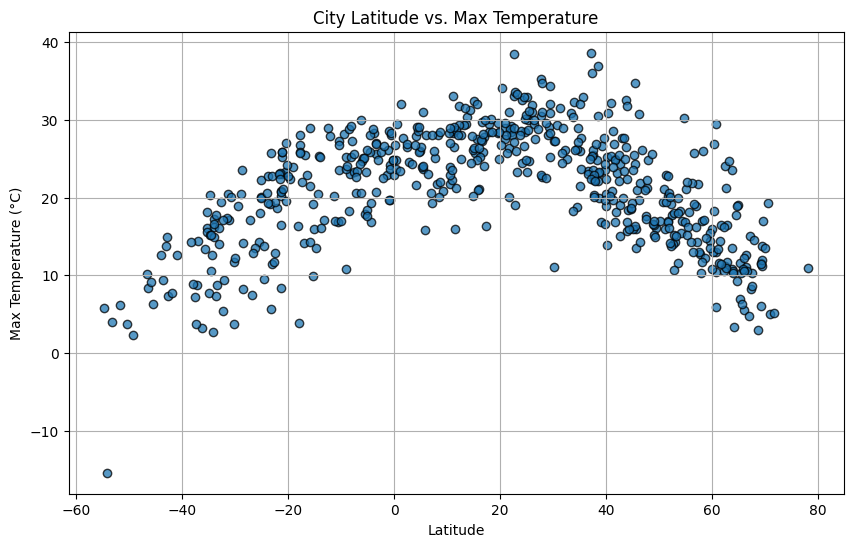

In [21]:
import matplotlib.pyplot as plt
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data//Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

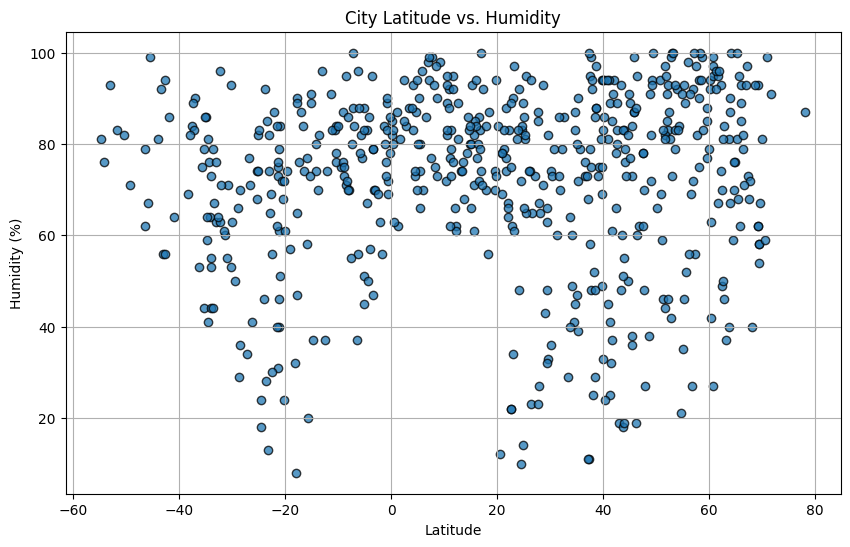

In [23]:
# Build the scatter plot for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

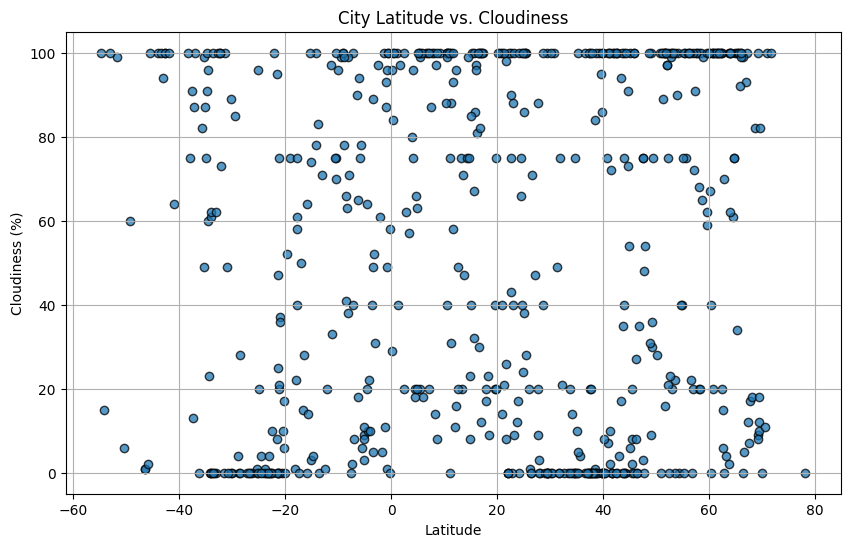

In [25]:
# Build the scatter plot for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

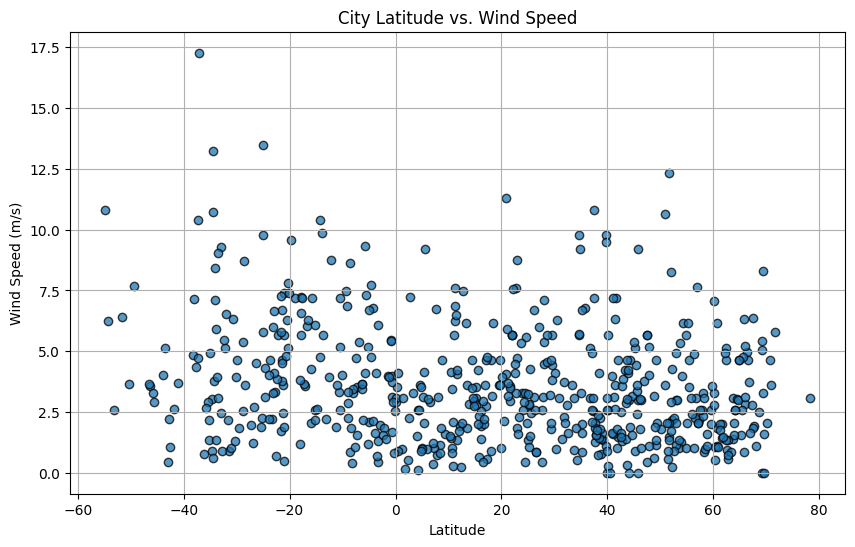

In [27]:
# Build the scatter plot for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = slope * x_values + intercept
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolor='black', alpha=0.75)
    plt.plot(x_values, regress_values, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")
    
    # Incorporate other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    
    # Print r-squared value
    print(f"R-squared: {r_value**2:.2f}")
    
    # Save the figure
    plt.savefig(save_path)
    
    # Show plot
    plt.show()

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0].copy()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bosobolo,4.1833,19.9000,21.65,93,96,0.11,CD,2024-08-08 18:44:59
3,fort mcmurray,56.7268,-111.3810,25.77,27,0,3.09,CA,2024-08-08 18:42:34
4,olonkinbyen,70.9221,-8.7187,5.02,99,100,3.59,SJ,2024-08-08 18:44:59
5,bethel,41.3712,-73.4140,19.64,89,100,3.60,US,2024-08-08 18:45:00
6,zouerate,22.7187,-12.4521,33.07,22,43,7.61,MR,2024-08-08 18:45:00


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0].copy()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,chonchi,-42.6128,-73.8092,7.29,94,100,1.05,CL,2024-08-08 18:44:59
2,port-aux-francais,-49.3500,70.2167,2.39,71,60,7.68,TF,2024-08-08 18:44:59
7,adamstown,-25.0660,-130.1015,22.22,82,96,13.47,PN,2024-08-08 18:45:00
8,rufino,-34.2683,-62.7126,2.73,64,0,3.78,AR,2024-08-08 18:45:00
9,avarua,-21.2078,-159.7750,23.03,46,20,3.60,CK,2024-08-08 18:45:01


###  Temperature vs. Latitude Linear Regression Plot

R-squared: 0.47


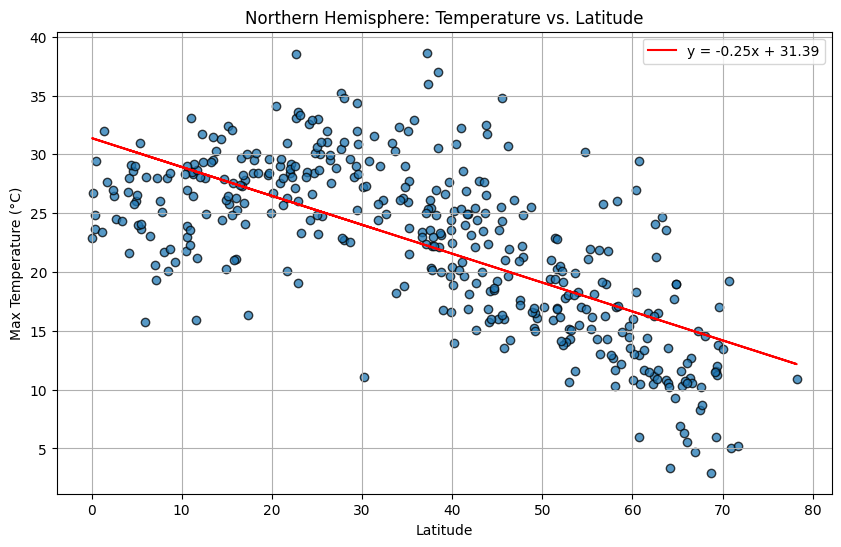

In [44]:
# Linear regression on Northern Hemisphere
# Using the plot_linear_regression function for Northern Hemisphere Temperature vs. Latitude
plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Max Temp'], 
    'Latitude', 
    'Max Temperature (°C)', 
    'Northern Hemisphere: Temperature vs. Latitude', 
    "output_data/Northern_Lat_vs_Temp_Regression.png"
)

R-squared: 0.54


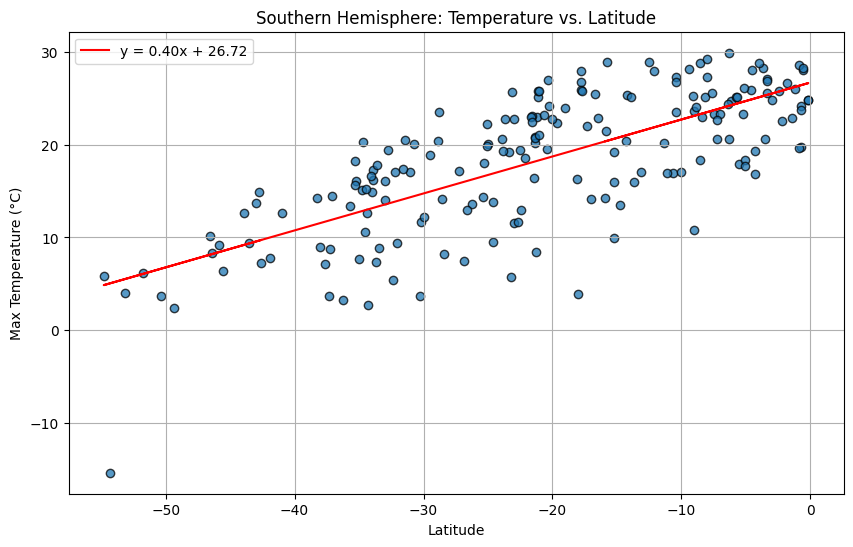

In [46]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Max Temp'], 
    'Latitude', 
    'Max Temperature (°C)', 
    'Southern Hemisphere: Temperature vs. Latitude', 
    "output_data/Southern_Lat_vs_Temp_Regression.png"
)

**Discussion about the linear relationship:** 
In the first chart we can observe that latitude increases in the northern hemisphere we can oberve that temperature decreases. However, latitude increases in the southern hemisphere we can oberve that temperature increases. The temperature increases as the latitude approaches the equator.

### Humidity vs. Latitude Linear Regression Plot

R-squared: 0.00


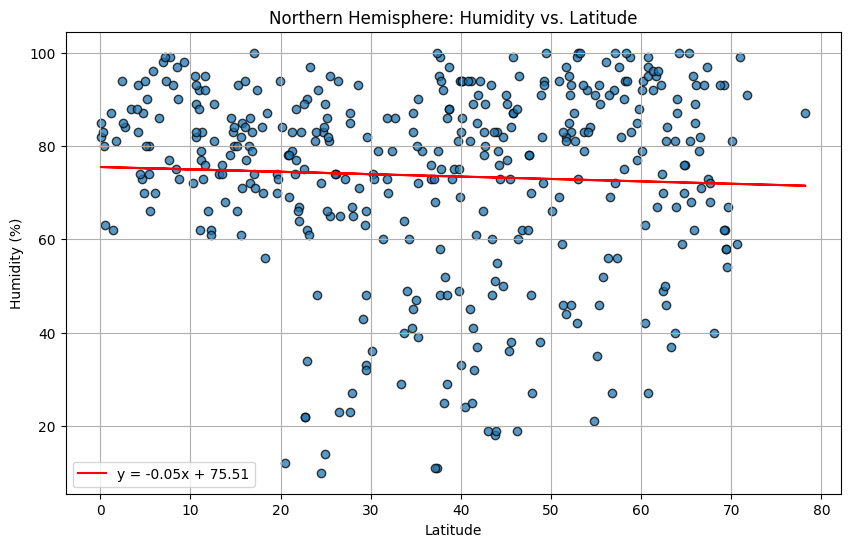

In [42]:
# Northern Hemisphere
# Using the plot_linear_regression function for Northern Hemisphere Humidity vs. Latitude
plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Humidity'], 
    'Latitude', 
    'Humidity (%)', 
    'Northern Hemisphere: Humidity vs. Latitude', 
    "output_data/Northern_Lat_vs_Humidity_Regression.png"
)

R-squared: 0.00


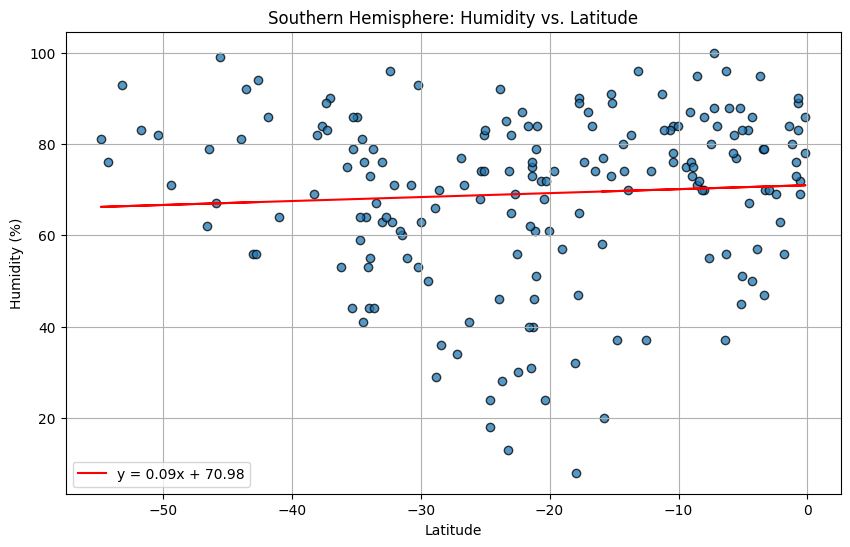

In [48]:
# Using the plot_linear_regression function for Southern Hemisphere Humidity vs. Latitude
plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Humidity'], 
    'Latitude', 
    'Humidity (%)', 
    'Southern Hemisphere: Humidity vs. Latitude', 
    "output_data/Southern_Lat_vs_Humidity_Regression.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R-squared: 0.00


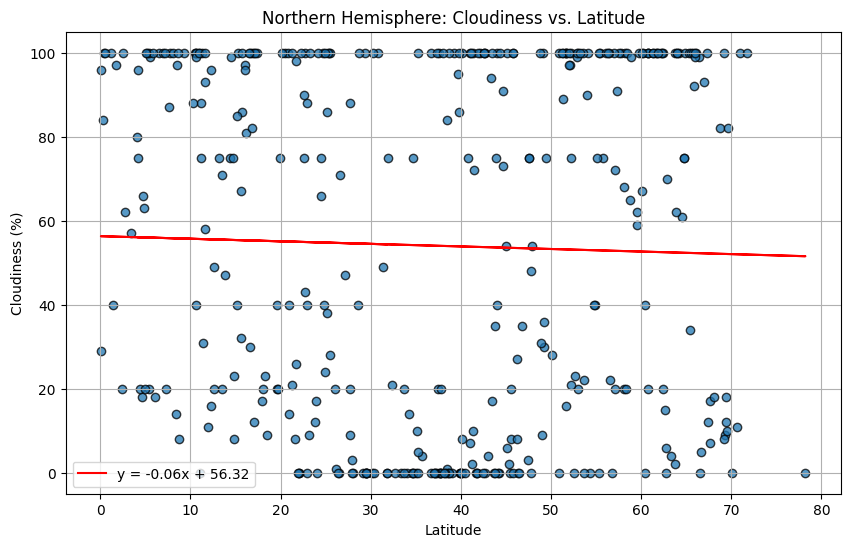

In [50]:
# Northern Hemisphere
# Using the plot_linear_regression function for Northern Hemisphere Cloudiness vs. Latitude
plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Cloudiness'], 
    'Latitude', 
    'Cloudiness (%)', 
    'Northern Hemisphere: Cloudiness vs. Latitude', 
    "output_data/Northern_Lat_vs_Cloudiness_Regression.png"
)

R-squared: 0.00


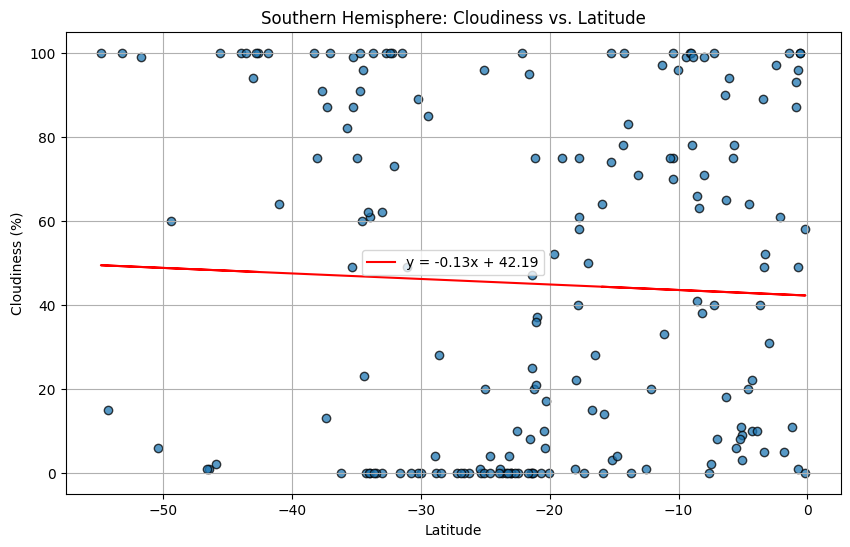

In [52]:
# Southern Hemisphere
# Using the plot_linear_regression function for Southern Hemisphere Cloudiness vs. Latitude
plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Cloudiness'], 
    'Latitude', 
    'Cloudiness (%)', 
    'Southern Hemisphere: Cloudiness vs. Latitude', 
    "output_data/Southern_Lat_vs_Cloudiness_Regression.png"
)

**Discussion about the linear relationship: There does not appear to be relationship between cloudiness and latitude. Neither deviating from or heading towards the equator has a consistent effect.

### Wind Speed vs. Latitude Linear Regression Plot

R-squared: 0.00


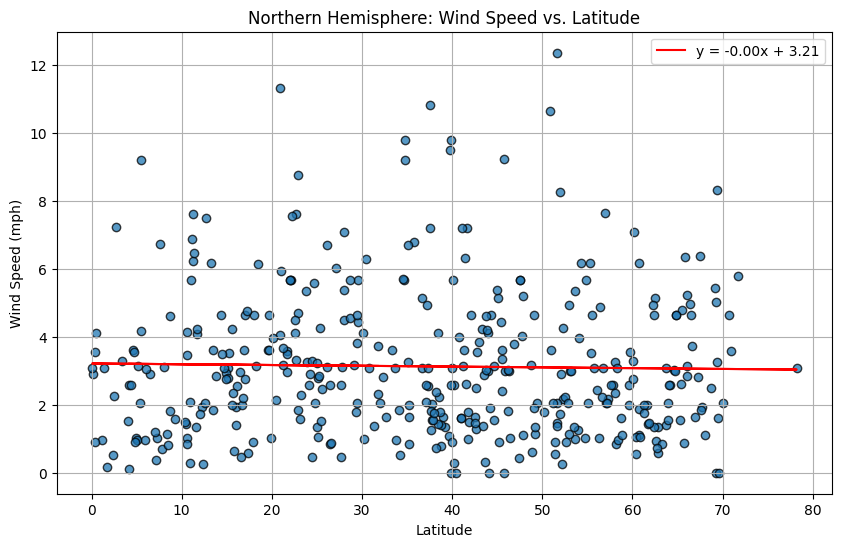

In [55]:
# Northern Hemisphere
# Using the plot_linear_regression function for Northern Hemisphere Wind Speed vs. Latitude
plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Wind Speed'], 
    'Latitude', 
    'Wind Speed (mph)', 
    'Northern Hemisphere: Wind Speed vs. Latitude', 
    "output_data/Northern_Lat_vs_Wind_Speed_Regression.png"
)

R-squared: 0.02


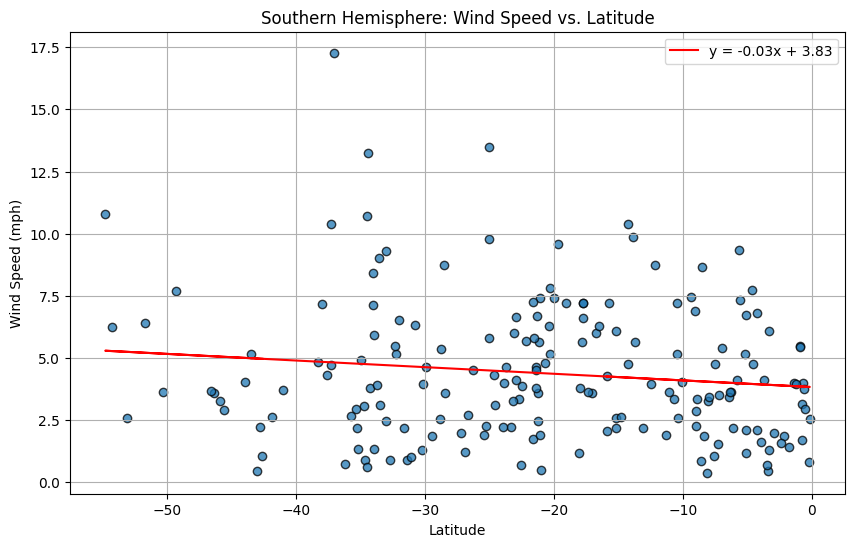

In [57]:
# Southern Hemisphere
# Using the plot_linear_regression function for Southern Hemisphere Wind Speed vs. Latitude
plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Wind Speed'], 
    'Latitude', 
    'Wind Speed (mph)', 
    'Southern Hemisphere: Wind Speed vs. Latitude', 
    "output_data/Southern_Lat_vs_Wind_Speed_Regression.png"
)

**Discussion about the linear relationship:** There does not appear to be relationship between Wind Speed and latitude.